# Airline Analysis

In this project I explored the ins and outs of airline prices. I wanted to find the best deals and understand how airline prices change based on different factors.

The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?


## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  
376.58525308213905
380.56


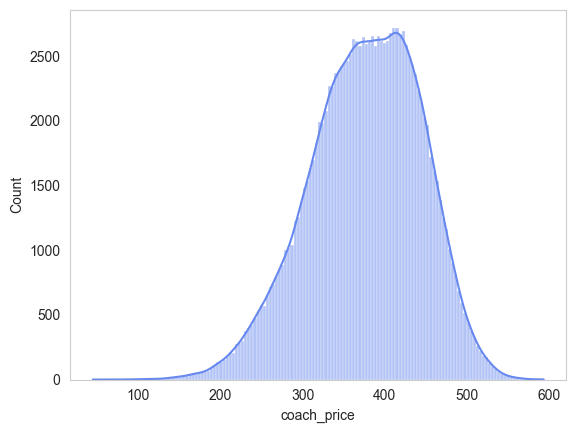

<Figure size 640x480 with 0 Axes>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
flight = pd.read_csv("flight.csv")
print(flight.head())

# Average
print(np.mean(flight.coach_price))
# Middle value 
print(np.median(flight.coach_price))

# History ploti
sns.set_style("whitegrid")
sns.set_palette("coolwarm")
sns.histplot(flight.coach_price, kde=True)

plt.grid(False)
plt.show()
plt.clf()


2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

431.834377372817
437.115


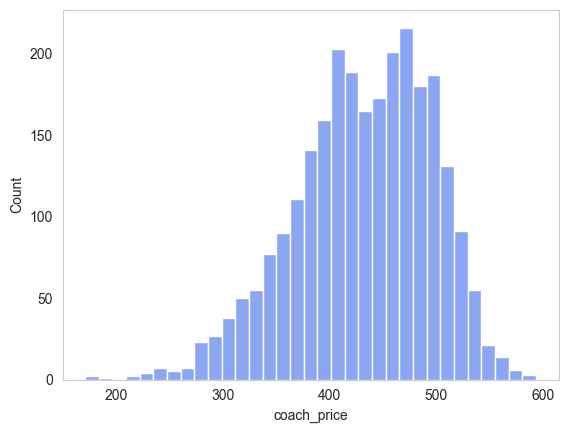

<Figure size 640x480 with 0 Axes>

In [14]:
# Average price of a flight ticket of 8 hours
print(np.mean(flight.coach_price[flight.hours == 8])) 

# Median price of a flight ticket of 8 hours
print(np.median(flight.coach_price[flight.hours == 8])) 

# History plot
sns.set_style("whitegrid")
sns.set_palette("coolwarm")
sns.histplot(flight.coach_price[flight.hours == 8])
plt.grid(False)
plt.show()
plt.clf()

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

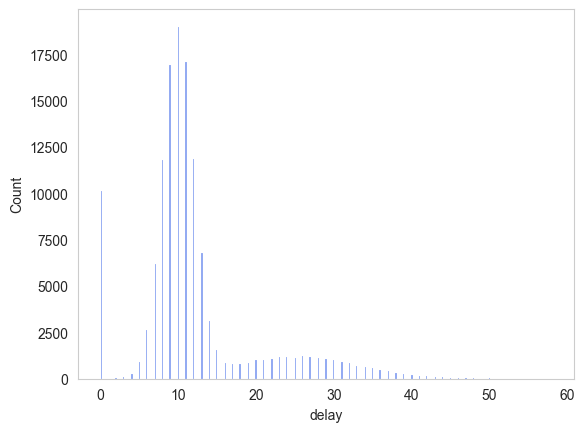

<Figure size 640x480 with 0 Axes>

In [15]:
# Recurrence in delays
sns.set_style("whitegrid")
sns.set_palette("coolwarm")
sns.histplot(flight.delay[flight.delay <= 500])

plt.grid(False)
plt.show()
plt.clf()



## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

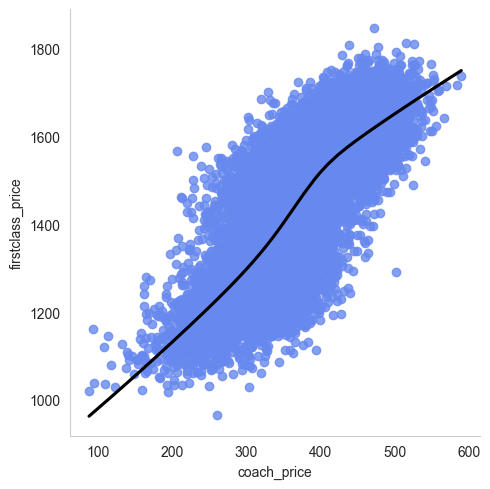

<Figure size 640x480 with 0 Axes>

In [16]:
# 10% of data set
perc = 0.1

# Randomly select 10% of total rows. flight.shape[0] gives number of rows 
flight_sub = flight.sample(n = int(flight.shape[0]*perc))

sns.set_style("whitegrid")
sns.set_palette("coolwarm")
sns.lmplot(x = "coach_price", y = "firstclass_price", data = flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.grid(False)
plt.show()
plt.clf()


5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

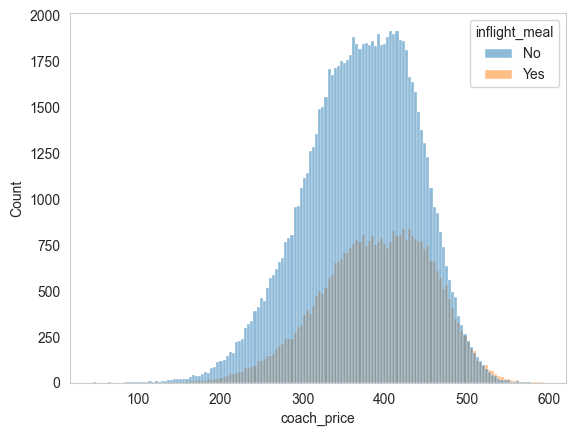

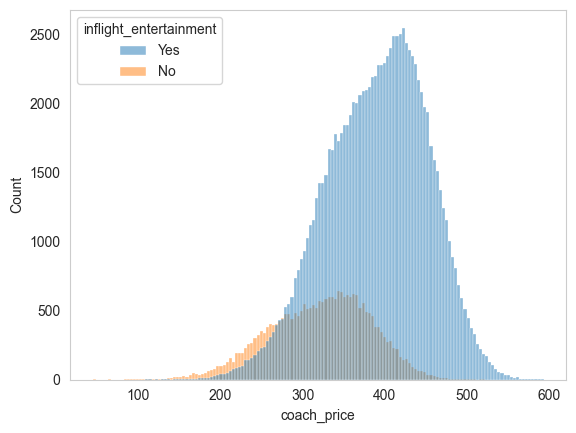

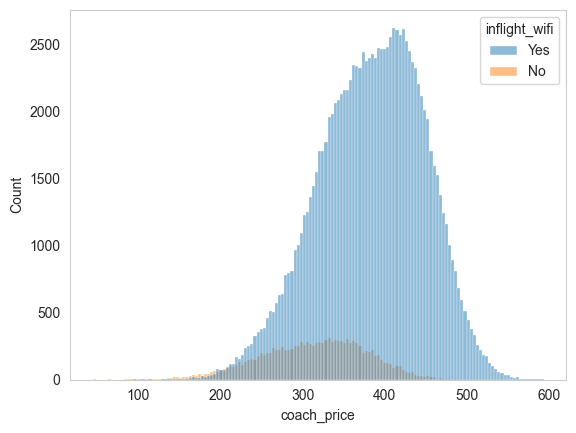

<Figure size 640x480 with 0 Axes>

In [28]:
sns.set_style("whitegrid")
custom_palette = ["#1f77b4", "#ff7f0e"]

plt.grid(False)
sns.histplot(flight, x = "coach_price", hue = flight.inflight_meal, palette=custom_palette)
plt.show()
plt.clf()

sns.histplot(flight, x = "coach_price", hue = flight.inflight_entertainment, palette=custom_palette)
plt.grid(False)
plt.show()
plt.clf()

sns.histplot(flight, x = "coach_price", hue = flight.inflight_wifi, palette=custom_palette)
plt.grid(False)
plt.show()
plt.clf()


6. How does the number of passengers change in relation to the length of flights?

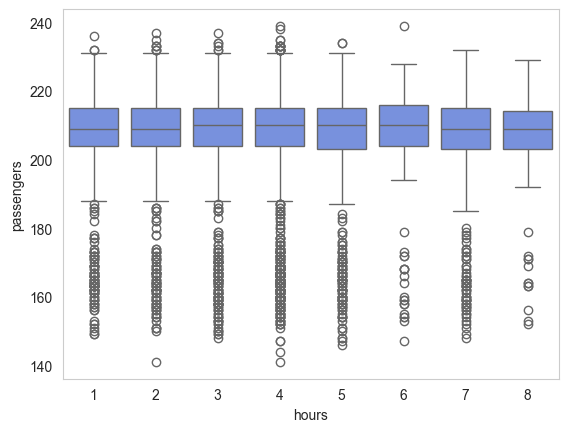

<Figure size 640x480 with 0 Axes>

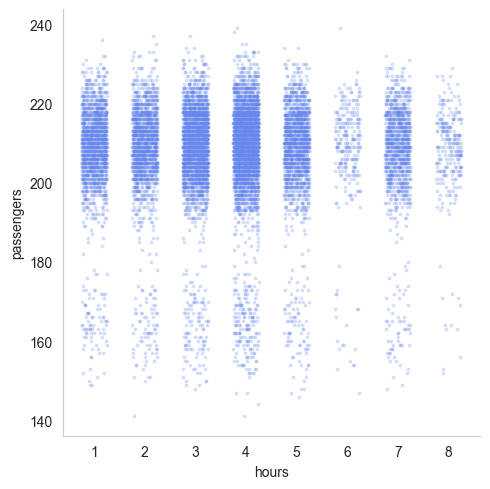

<Figure size 640x480 with 0 Axes>

In [18]:
sns.boxplot(x = "hours", y = "passengers", data = flight_sub)
plt.grid(False)
plt.show()
plt.clf()

sns.lmplot(x= "hours", y = "passengers", data = flight_sub, x_jitter=0.25, scatter_kws={"s": 3, "alpha": 0.2}, fit_reg = False)
plt.grid(False)
plt.show()
plt.clf()

## Flighs that are 6 and 8 hours have less amount of passangers, than flights with a 1-4 hour duration.

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

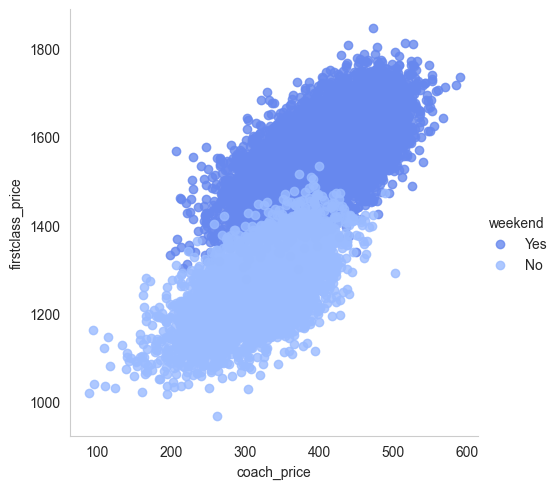

<Figure size 640x480 with 0 Axes>

In [21]:
sns.lmplot(x = 'coach_price', y = 'firstclass_price', hue = 'weekend', data = flight_sub, fit_reg=False)

sns.set_style("whitegrid")
plt.style.use('dark_background')
sns.set_palette("coolwarm")

plt.grid(False)
plt.show()
plt.clf()

# This graph shows that the price of both the first class tickets and coach tickets is higher during the weekends

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

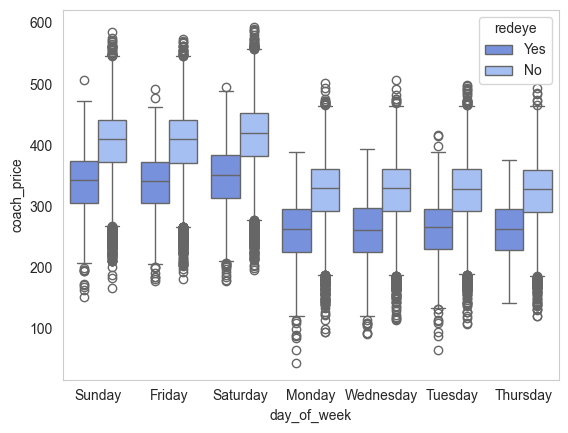

<Figure size 640x480 with 0 Axes>

In [24]:
sns.boxplot(x = 'day_of_week', y = 'coach_price', hue = 'redeye',data = flight)
sns.set_style("whitegrid")
plt.style.use('dark_background')
plt.grid(False)
plt.show()
plt.clf()

## Using this boxplot to show distributions with respect to categories.
## In this case during the weekends the redeye coach flights are cheaper than the non-redeye flights.
## And during the weekdays the  

## Conclusions

#### 1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket? ####

1. Mean: The mean price is $376.58, which represents the average price of a coach ticket across the entire sample.
2.	Median: The median price is $380.56, meaning that half of the ticket prices are below this value and half are above it.
3.	Interpretation of $500: Since $500 is higher than both the mean ($376.58) and the median ($380.56), it does seem more expensive. Given that most of the tickets (2500 tickets) are priced between $300 and $400, $500 would likely be on the higher end and might be considered overpriced.

#### 2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before? ####

1. Mean: The mean price is $431.83, which represents the average price of a coach ticket for flights that are 8 hours long.
2. Median: The median price is $437.11, meaning that half of the tickets prices are below this value and half are above it.
3. Interpretation of $500: for more longer flights the prices are more reasonable


#### 3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical? ####

1. Flight Delay Duration:
* No delays: there are 10,000 flights that have no delays, which suggests a significant portion of flights are on time
* 10-minute delays: there are 17,500 flights that have 10-minute delays. This suggests that a 10-minute delay is typical
* Longer delays: delays of 20-40 minutes are mentioned as less typical, which indicates they occur less frenquently and might be considered more of an exception

2. Connecting flights:
* Since 10-minute delays are typical, it might be wise to account for a small buffer (10-15 minutes) when scheduling connecting flights to minimize the risk of missing connecting flights.

3. Overall Airline Punctuality:
* Given the larger number of on-time flights and the relatively few longer delays, it seems the airline is generally punctual. 

#### 4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well? ####

This nonlinear lowless trend means that for cheap coach seats the first class prices increases gradually. 
At higher coach prices, first-class prices increases more steeply, meaning that the price difference between classes grows at a faster rate

The steepness change suggests that airlines may price first-class tickets disproportionately higher for expensive flights.

#### 5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price? ####

1. Inflight meals:
* The presence of inflight meals is more frequent in the higher price range, typically above 300.
* Flights with inflight meals tend to be priced higer

2. Inflight Entertainment:
* Flights with inflight entertainment are associated with higher coach prices

3. Inflight WiFi:
* Similar to flight entertainment, flights with WiFi tend to have higher coach prices

All three features are associated with higher coach prices. Inflight entertainment and WiFi have the strongest correlation with increased prices.

#### 6. How does the number of passengers change in relation to the length of flights?

The duration of flights also affect the amount of passengers:
* There are more amount of passengers in the 1-hour to  4-hour flights. 
* The are less amount of passengers in the 6-hour, 7-hour, and 8-hour flights

#### 7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

This graph shows that the price of both the first class tickets and coach tickets is higher during the weekends

#### 8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

In this case during the weekends the redeye coach flights are cheaper than the non-redeye flights.

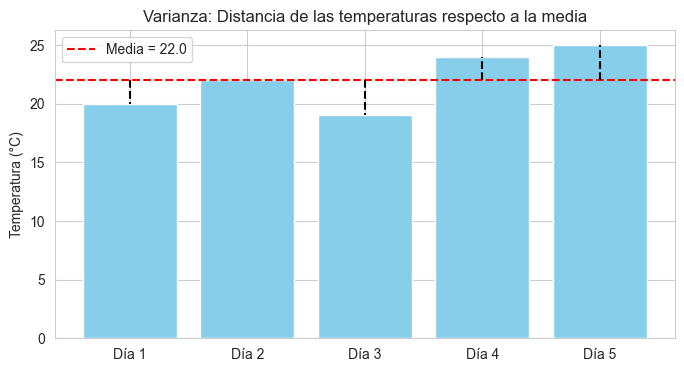

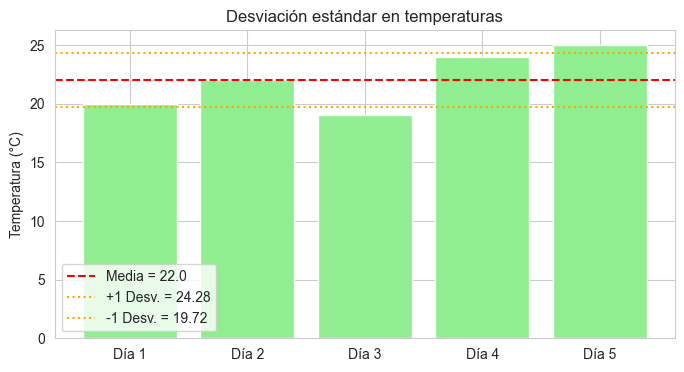

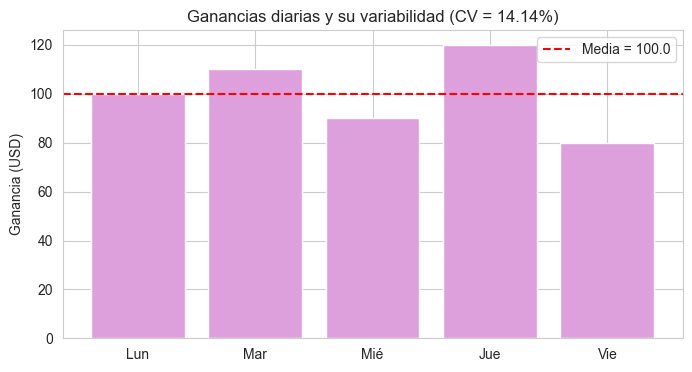

In [2]:
# Ejemplo 1: Varianza (Temperaturas)
temps = np.array([20, 22, 19, 24, 25])
temps_mean = np.mean(temps)

plt.figure(figsize=(8, 4))
plt.bar(range(len(temps)), temps, color='skyblue')
plt.axhline(temps_mean, color='red', linestyle='--', label=f'Media = {temps_mean}')
for i, t in enumerate(temps):
    plt.plot([i, i], [temps_mean, t], 'k--')
plt.title("Varianza: Distancia de las temperaturas respecto a la media")
plt.xticks(range(len(temps)), ['Día 1', 'Día 2', 'Día 3', 'Día 4', 'Día 5'])
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

# Ejemplo 2: Desviación Estándar (Temperaturas)
temps_std = np.std(temps)

plt.figure(figsize=(8, 4))
plt.bar(range(len(temps)), temps, color='lightgreen')
plt.axhline(temps_mean, color='red', linestyle='--', label=f'Media = {temps_mean}')
plt.axhline(temps_mean + temps_std, color='orange', linestyle=':', label=f'+1 Desv. = {round(temps_mean+temps_std, 2)}')
plt.axhline(temps_mean - temps_std, color='orange', linestyle=':', label=f'-1 Desv. = {round(temps_mean-temps_std, 2)}')
plt.title("Desviación estándar en temperaturas")
plt.xticks(range(len(temps)), ['Día 1', 'Día 2', 'Día 3', 'Día 4', 'Día 5'])
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

# Ejemplo 3: Coeficiente de Variación (Ganancias)
gains = np.array([100, 110, 90, 120, 80])
gains_mean = np.mean(gains)
gains_std = np.std(gains)
cv = (gains_std / gains_mean) * 100

plt.figure(figsize=(8, 4))
plt.bar(range(len(gains)), gains, color='plum')
plt.axhline(gains_mean, color='red', linestyle='--', label=f'Media = {gains_mean}')
plt.title(f"Ganancias diarias y su variabilidad (CV = {round(cv, 2)}%)")
plt.xticks(range(len(gains)), ['Lun', 'Mar', 'Mié', 'Jue', 'Vie'])
plt.ylabel('Ganancia (USD)')
plt.legend()
plt.show()